### 팔 다리 움직임 분석한 데이터
### 정상 데이터 - sitting
### 비정상 데이터 - jumping
### 오토인코더 모델 활용

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비

In [212]:
import pandas as pd

df = pd.read_csv('C:/Users/USER/Desktop/Deep_Learning/DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [213]:
df.shape

(9120, 272)

In [214]:
# activity 열에 있는 고유한 값을 추출
act = df['activity'].unique()
act

array(['sitting', 'standing', 'lyingBack', 'lyingRigh', 'ascendingStairs',
       'decendingStairs', 'standingInElevatorStill', 'movingInElevator',
       'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline',
       'runningTreadmill', 'stepper', 'crossTrainer', 'cyclingHorizontal',
       'cyclingVertical', 'rowing', 'jumping', 'basketBall'], dtype=object)

In [215]:
# 결측치 확인
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [216]:
# 하나라도 있으면 True, 없으면 False
df.isnull().values.any()

False

# 2. sitting, jumping만 남기기

In [218]:
df = df[(df['activity']=='jumping') | (df['activity']=='sitting')]
# people 열 삭제
df = df.drop(['people'],axis=1) # 1: 열 삭제. 0: 행 삭제
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,jumping
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,jumping
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,jumping
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,jumping


In [219]:
# adtivity 열은 수치형 데이터가 아닌 object 타입이므로 범주형 데이터로 바꿔줌(수치형)
# 'sitting'을 1으로, 'jumping'을 0로 변환
df['activity'] = df['activity'].map({'sitting': 1, 'jumping': 0})
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,0
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,0
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,0
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,0


# 3. 훈련, 검증, 테스트 세트로 나누기

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train, test, valid
x_train, x_test = train_test_split(df,test_size=0.2)
x_train, x_valid = train_test_split(x_train, test_size=0.2)

In [222]:
# training/valid에서 jumping 데이터를 삭제 ( sitting 을 정상데이터로 사용)

x_train = x_train[x_train.activity == 0]
x_train=x_train.drop(['activity'],axis=1)

x_valid = x_valid[x_valid.activity ==0]
x_valid = x_valid.drop(['activity'],axis=1)

In [223]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임

y_test = x_test['activity']

x_test = x_test.drop(['activity'],axis=1)

x_train.shape, x_valid.shape, x_test.shape

((311, 270), (81, 270), (192, 270))

# 3-1. 표준화

In [225]:
# 표준화는 train에 fit한 결과를 바탕으로 나머지 valid,test에 적용.
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_valid=ss.transform(x_valid)
x_test=ss.transform(x_test)

C:\Users\USER\AppData\Local\Temp\ipykernel_25388\2914671812.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['activity'], sort = True)


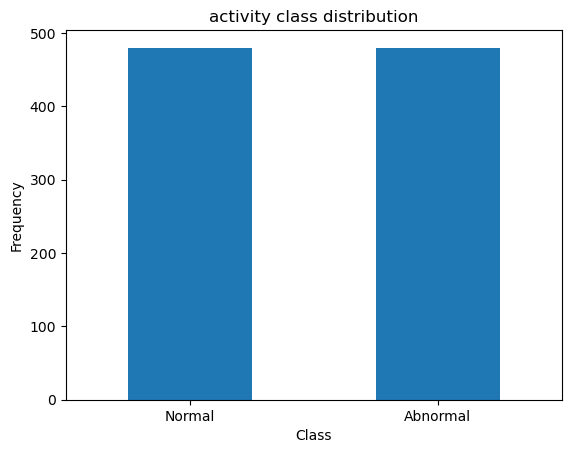

In [226]:
LABELS = ["Normal","Abnormal"]
count_classes = pd.value_counts(df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("activity class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# 정상, 비정상 클래스 비율 확인 -> 1:1

# 4. 오토인코더 모델 정의

In [229]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [234]:
# 오토인코더 모델

input_dim = x_train.shape[1]
#입력 차원의 1/10인 27을 넣을 수도 있다.
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 14)                  │           3,794 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 270)                 │           2,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,115 (23.89 KB)

 Trainable params: 6,115 (23.89 KB)

 Non-trainable params: 0 (0.00 B)

In [235]:
history = autoencoder.fit(x_train,x_train,epochs=50,batch_size=16,validation_data=(x_valid,x_valid),shuffle=True)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2458 - val_loss: 1.2381
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1976 - val_loss: 1.1642
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1332 - val_loss: 1.0723
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0312 - val_loss: 0.9977
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9790 - val_loss: 0.9385
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9229 - val_loss: 0.8927
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8612 - val_loss: 0.8600
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8693 - val_loss: 0.8352
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8598 - val_loss: 0.8167
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8099 - val_loss: 0.8035
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7872 - val_loss: 0.7944
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7580 - val_l

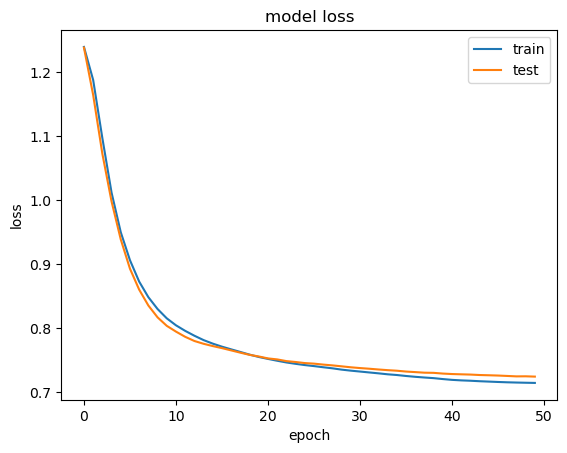

In [236]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

# 5. 결과

In [262]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df = error_df.reset_index(drop = True)

error_df.describe()

# 정상 데이터의 reconstruction_error는 min 0.3, max 2.1 사이

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,reconstruction_error,true_class
count,192.000000,192.000000
mean,2.786276,0.541667
std,1.932747,0.499564
min,0.353761,0.000000
25%,0.654758,0.000000
50%,3.907657,1.000000
75%,4.546107,1.000000
max,5.808923,1.000000


In [264]:
error_df.head()

,reconstruction_error,true_class
0,0.829945,0
1,4.084301,1
2,5.195963,1
3,4.620146,1
4,0.369266,0


In [266]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()

,reconstruction_error,true_class
count,88.000000,88.0
mean,0.746718,0.0
std,0.418548,0.0
min,0.353761,0.0
25%,0.420033,0.0
50%,0.627754,0.0
75%,0.980450,0.0
max,2.192779,0.0


In [268]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,104.000000,104.0
mean,4.512055,1.0
std,0.466710,0.0
min,3.827205,1.0
25%,4.122136,1.0
50%,4.515355,1.0
75%,4.822750,1.0
max,5.808923,1.0


In [270]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()

,reconstruction_error,true_class
count,104.000000,104.0
mean,4.512055,1.0
std,0.466710,0.0
min,3.827205,1.0
25%,4.122136,1.0
50%,4.515355,1.0
75%,4.822750,1.0
max,5.808923,1.0


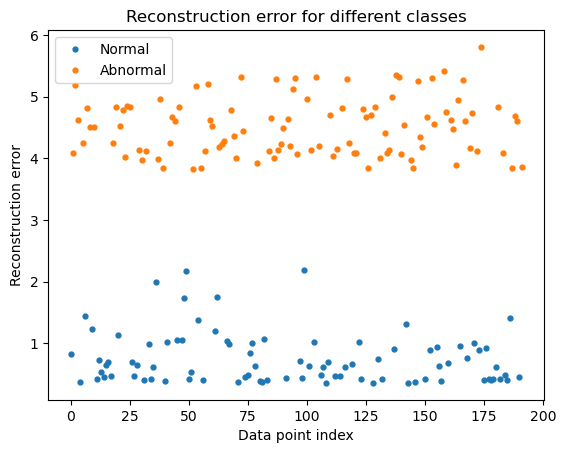

In [272]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

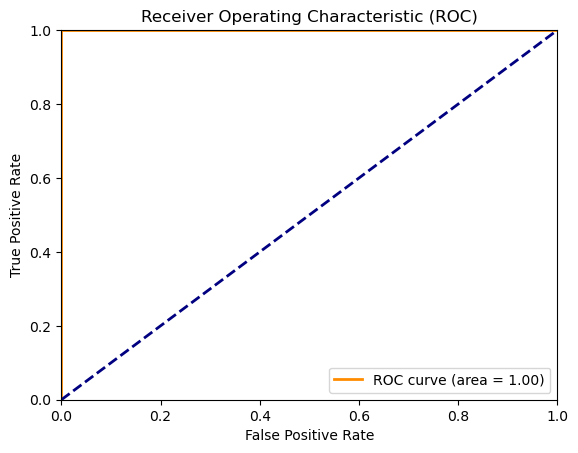

In [274]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 실제 클래스와 재구성 오류를 이용해 ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [276]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 3.8272045428553754


In [278]:
# threshold 값을 조정하여 최선의 정확도를 얻음,

threshold = 0.7495629645881631

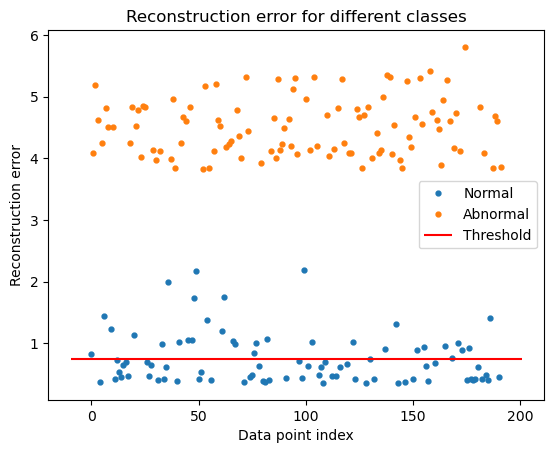

In [280]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

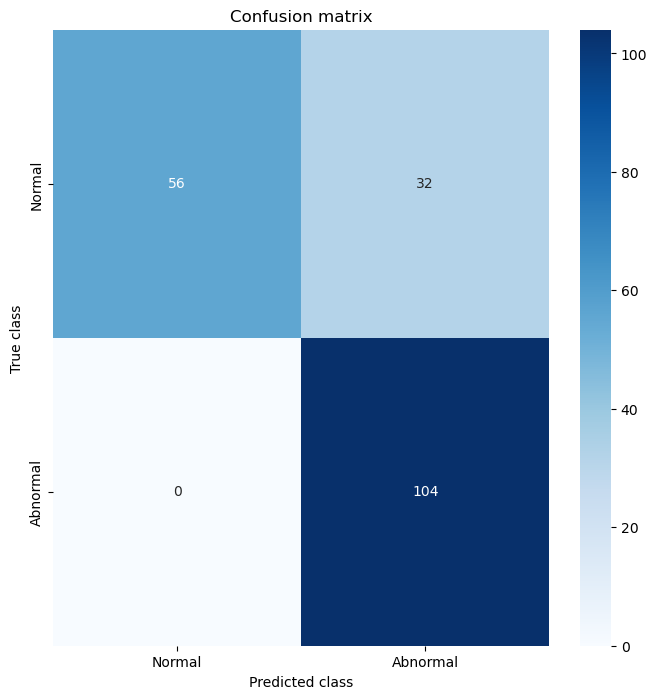

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        88
           1       0.76      1.00      0.87       104

    accuracy                           0.83       192
   macro avg       0.88      0.82      0.82       192
weighted avg       0.87      0.83      0.83       192



In [282]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap="Blues");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))